# Plot MERRA-2 T, q, tdt, qdt in DYCOMS period, along longitude at a specific latitude.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types
import yhc_module as yhc
from datetime import date

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

Matplotlib is building the font cache; this may take a moment.


## Read MERRA-2 data

In [14]:
#--- open data
datapath = "../data.MERRA-2.tavg3_3d_asm_Nv.200107/"
datapath_flx = "../data.MERRA-2.tavg1_2d_flx_Nx.200107/"

ds_merra2 = xr.open_dataset(datapath+"/"+"pp_CA-MERRA2_300.tavg3_3d_asm_Nv.20010710.SUB.nc")
ds_tadv = xr.open_dataset(datapath+"/"+"pp_CA-data02-MERRA2_300.tavg3_3d_asm_Nv.20010710.SUB-T_hadv.nc")
ds_qadv = xr.open_dataset(datapath+"/"+"pp_CA-data02-MERRA2_300.tavg3_3d_asm_Nv.20010710.SUB-QV_hadv.nc")
ds_flx = xr.open_dataset(datapath_flx+"/"+"pp_CA-MERRA2_300.tavg1_2d_flx_Nx.20010710.SUB.nc")

ds_merra2 = yhc.wrap360(ds_merra2)
ds_tadv = yhc.wrap360(ds_tadv)
ds_qadv = yhc.wrap360(ds_qadv)
ds_flx = yhc.wrap360(ds_flx)

ds_merra2


<xarray.Dataset>
Dimensions:  (lon: 49, time: 8, lev: 72, lat: 31)
Coordinates:
  * lon      (lon) float64 230.0 230.6 231.2 231.9 ... 258.1 258.8 259.4 260.0
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 38.0 38.5 39.0 39.5 40.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2001-07-10T01:30:00 ... 2001-07-10T22:30:00
Data variables: (12/14)
    CLOUD    (time, lev, lat, lon) float32 ...
    DELP     (time, lev, lat, lon) float32 ...
    H        (time, lev, lat, lon) float32 ...
    OMEGA    (time, lev, lat, lon) float32 ...
    PL       (time, lev, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    ...       ...
    QV       (time, lev, lat, lon) float32 ...
    RH       (time, lev, lat, lon) float32 ...
    SLP      (time, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Fri Sep 16 11:48:47 2022: ncks -d lat,...
    Comment:                           GMAO filename: d5124_m2_jan00.tavg3_3d...
    Filename:                          MERRA2_300.tavg3_3d_asm_Nv.20010710.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2001-07-10
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...
    NCO:                               netCDF Operators version 5.1.0 (Homepa...

## Choose DYCOMS region

In [164]:
region = "DYCOMS"
time_sel = "2001-07-10T10:30:00.000000000"
#lat_sel = 31.
lat_sel = 31.5

lon_slice, lat_slice0 = yhc.get_region_latlon(region)
lat_slice = slice(lat_sel,lat_sel)

T = ds_merra2.T.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
QV = ds_merra2.QV.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
U = ds_merra2.U.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
V = ds_merra2.V.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
OMEGA = ds_merra2.OMEGA.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
PL = ds_merra2.PL.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
H = ds_merra2.H.sel(time=time_sel, lat=lat_slice, lon=lon_slice)

PBLH = ds_flx.PBLH.sel(time=time_sel, lat=lat_slice, lon=lon_slice)

T_adv_sphere = -ds_tadv.T_adv_sphere.sel(time=time_sel, lat=lat_slice, lon=lon_slice)
QV_adv_sphere = -ds_qadv.QV_adv_sphere.sel(time=time_sel, lat=lat_slice, lon=lon_slice)


PBLH

<xarray.DataArray 'PBLH' (lat: 1, lon: 7)>
array([[952.28796, 898.53796, 871.53796, 788.28796, 725.78796, 624.78796,
        591.03796]], dtype=float32)
Coordinates:
  * lon      (lon) float64 236.2 236.9 237.5 238.1 238.8 239.4 240.0
  * lat      (lat) float64 31.5
    time     datetime64[ns] 2001-07-10T10:30:00
Attributes:
    standard_name:   planetary_boundary_layer_height
    long_name:       planetary_boundary_layer_height
    units:           m
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

## plot

In [165]:
lat = lat_sel
lon = np.array([236.25 , 236.875, 237.5  , 238.125, 238.75 , 239.375, 240.])
lon = 360. - lon.copy()
degE = "W"

lon_string = [str(lon1) + degE for lon1 in lon]
print(lon_string)

suptitle = "MERRA-2, "+time_sel+", lat="+str(lat_sel)+"N"

#==============================
def ax_def_xy (ax, var):

    #--- set grids
    ax.grid(True)
    ax.minorticks_on()
    
    #--- inverse axes
    #ax.invert_yaxis()
    
    #--- legend
    ax.legend(lon_string)
    
    #--- set x or y labels
    ax.set_ylabel("Height (m)")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    ax.set_xlabel(var.attrs['long_name']+" ("+var.attrs['units']+")")
    
    ax.set_ylim([0., 2000.])

#============================== 

['123.75W', '123.125W', '122.5W', '121.875W', '121.25W', '120.625W', '120.0W']


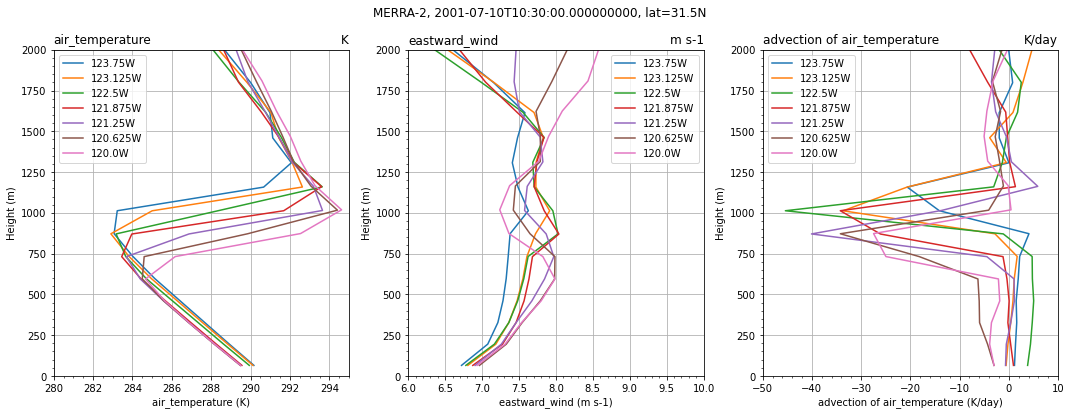

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))   # 1 row, 3 columns
fig.suptitle(suptitle)

#--- ax1
ax1.plot(T[:,0,:], H[:,0,:])
ax1.set_xlim([280., 295.])
ax_def_xy(ax1, T)

#--- ax2
ax2.plot(U[:,0,:], H[:,0,:],
         #V[:,0,:], H[:,0,:],
        )
ax2.set_xlim([6., 10.])
ax_def_xy(ax2, U)

#--- ax3
ax3.plot(T_adv_sphere[:,0,:]*86400., H[:,0,:])
ax3.set_xlim([-50, 10.])
var_dum = T_adv_sphere
var_dum.attrs['units']="K/day"
ax_def_xy(ax3, var_dum)



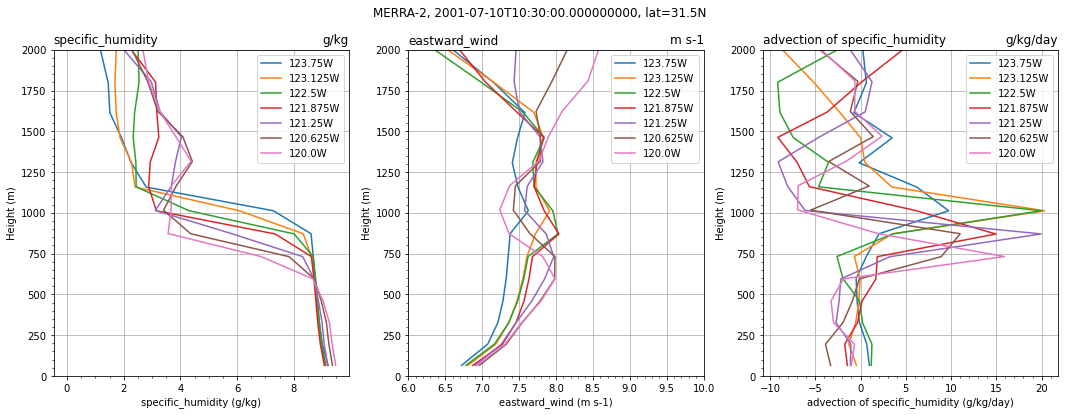

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))   # 1 row, 3 columns
fig.suptitle(suptitle)

#--- ax1
ax1.plot(QV[:,0,:]*1000., H[:,0,:])
#ax1.set_xlim([280., 295.])
var_dum = QV
var_dum.attrs['units']="g/kg"
ax_def_xy(ax1, var_dum)

#--- ax2
ax2.plot(U[:,0,:], H[:,0,:],
         #V[:,0,:], H[:,0,:],
        )
ax2.set_xlim([6., 10.])
ax_def_xy(ax2, U)

#--- ax3
ax3.plot(QV_adv_sphere[:,0,:]*86400.*1000., H[:,0,:])
#ax3.set_xlim([-50, 10.])
var_dum = QV_adv_sphere
var_dum.attrs['units']="g/kg/day"
ax_def_xy(ax3, var_dum)

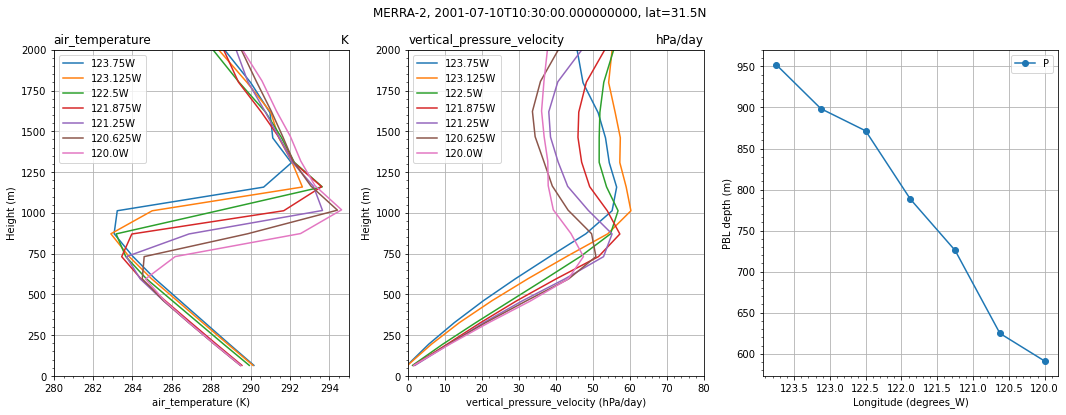

In [168]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))   # 1 row, 3 columns
fig.suptitle(suptitle)


#--- ax1
ax1.plot(T[:,0,:], H[:,0,:])
ax1.set_xlim([280., 295.])
ax_def_xy(ax1, T)

#--- ax2
ax2.plot(OMEGA[:,0,:]*864., H[:,0,:])
var_dum = OMEGA
var_dum.attrs['units']="hPa/day"
ax2.set_xlim([0., 80.])
ax_def_xy(ax2, var_dum)

#--- ax3
ax3.plot(lon, PBLH[0,:],'-o')
#ax_def_xy(ax3, PBLH)
ax3.invert_xaxis()
ax3.set_xlabel("Longitude (degrees_W)")
ax3.set_ylabel("PBL depth (m)")
ax3.legend("PBL_depth")
ax3.grid(True)
ax3.minorticks_on()

#ax3.set_xlim([-50, 10.])
#var_dum = T_adv_sphere
#var_dum.attrs['units']="K/day"
#ax_def_xy(ax3, var_dum)


In [24]:
yhc.lib("pltxy")


    #-------------
    # matplotlib.pyplot for XY plots
    #-------------  
    
    #--- open fig and ax    
    #      matplotlib.pyplot.subplot, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html  
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))   # 1 row, 3 columns
    fig, ((ax_1, ax_2, ax_3), (ax_4, ax_5, ax_6)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # 2 rows, 3 columns

    #--- set spacing betweeon subplots
    #      https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/ 
    fig.tight_layout()

    #--- XY line styles  
    #    * Line colors, https://matplotlib.org/stable/gallery/color/named_colors.html
    #        red (r), blue (b), green (g), cyan (c), magenta (m), yellow (y), black (k), white (w)
    #.   * Line dash pattern, https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
    #.       {'-', '--', '-.', ':'} {solid, dashed, dashdot, dotted}
    #.   * M